# Big Data and Policing
---
### The report consists of solutions to Question 2 of Homework 3.
---
Author : Kushagra Nagori
---

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [52]:
file = "savry_2017.csv"
df = pd.read_csv(file, sep='\t', index_col=False)
df.head()

,gender,nationality,main_crime_age,criminal_records,main_crime_category,main_crime_is_violent,risk01_previous_violence,risk02_history_nonviolent_offences,risk03_early_violence_before_14,risk04_past_intervention_fail,...,sum_social_risk_items,sum_individual_risk_items,sum_all_risk_items,sum_all_protective_items,professional_risk_evaluation,recidivism,recidivism_number_offences,recidividm_category_first_offence,recidivism_violence_first_offence,recidivism_severity
0,Male,Spanish,17,1 or 2 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,3,5,12,1,Low,No,0,Not applicable,Not applicable,0
1,Male,Spanish,17,3 to 5 criminal records,Against persons,Violent,Moderate,Moderate,Low,Moderate,...,5,6,19,4,Moderate,Yes,1,Others,No violent,1
2,Male,Foreigner,16,1 or 2 criminal records,Nonviolent against property,No violent,Low,Low,Low,Low,...,4,1,9,3,Low,No,0,Not applicable,Not applicable,0
3,Male,Spanish,17,0 criminal records,Against persons,Violent,Low,Low,Low,Low,...,1,5,9,2,High,No,0,Not applicable,Not applicable,0
4,Male,Spanish,16,3 to 5 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,2,2,13,0,Moderate,No,0,Not applicable,Not applicable,0


In [56]:
def draw_roc_curve( ground_truth, predictions, pos_label=True):
    fpr, tpr, thresholds = roc_curve(ground_truth, predictions, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right", fontsize='x-large')
    plt.show()
    return roc_auc

def data_vals(dt_train,dt_test,facts,feature):
    train_X = pd.get_dummies(dt_train[facts])
    train_y = dt_train[feature]
    test_X = pd.get_dummies(dt_test[facts])
    test_y = dt_test[feature]
    return train_X,train_y,test_X,test_y

train, test = train_test_split(df, test_size=0.33)
risk_factor_columns = ["risk01_previous_violence", "risk02_history_nonviolent_offences",
                       "risk03_early_violence_before_14", "risk04_past_intervention_fail",
                       "risk05_self_harm_suicide_attempts", "risk06_violence_at_home",
                       "risk07_childhood_mistreatment", "risk08_criminal_parent_caregiver",
                       "risk09_early_separation_parents", "risk10_poor_school_achievement", 
                       "risk11_delinquency_peer_group", "risk12_rejection_peer_group",
                       "risk13_poor_stress_coping", "risk14_poor_parental_skills_parents",
                       "risk15_lack_of_personal_social_support", "risk16_marginalized_environment",
                       "risk17_negative_attitudes", "risk18_risk_taker_impulsive",
                       "risk19_drug_abuse", "risk20_anger_management_issues",
                       "risk21_low_empaty", "risk22_attention_deficit",
                       "risk23_poor_compliance_interventions", "risk24_low_commitment_school"]
demographic_columns = ["gender", "nationality", "main_crime_age", "criminal_records",
                       "main_crime_category", "main_crime_is_violent"]
protective_factor_columns = ["protective01_prosocial_activities", "protective02_strong_social_support",
                             "protective03_strong_link_prosocial_adult", "protective04_positive_attitude_interventions",
                             "protective05_high_commitment_school_or_work", "protective06_perseverant_personality"]


factors = demographic_columns + risk_factor_columns + protective_factor_columns

# Part 1

In [57]:
data_prof_risk_low = df[df["professional_risk_evaluation"] == "Low"]["sum_all_risk_items"]
data_prof_risk_med = df[df["professional_risk_evaluation"] == "Moderate"]["sum_all_risk_items"]
data_prof_risk_high = df[df["professional_risk_evaluation"] == "High"]["sum_all_risk_items"]

containers = []
for i in range(10):
    containers.append(5*i)

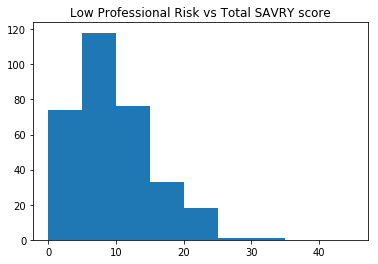

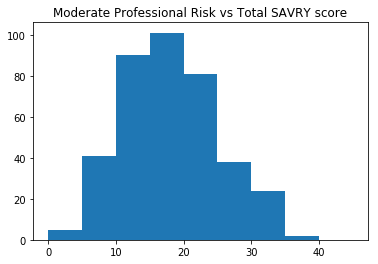

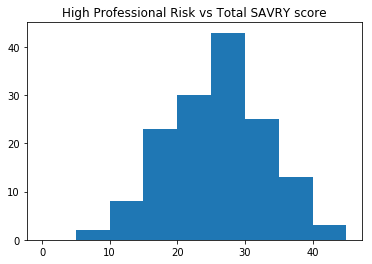

In [58]:
plt.hist(data_prof_risk_low, containers)
plt.title("Low Professional Risk vs Total SAVRY score")
plt.show()
plt.hist(data_prof_risk_med, containers)
plt.title("Moderate Professional Risk vs Total SAVRY score")
plt.show()
plt.hist(data_prof_risk_high, containers)
plt.title("High Professional Risk vs Total SAVRY score")
plt.show()

The SAVRY scores are relatively proportional to the Professional Risk Evaluation.

# Part 2

In [61]:
train_X, train_y, test_X, test_y = data_vals(train,test,factors,"recidivism")

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

correct_pred, accuracy_dict = (test_y == pred_y), {}

for index, row in correct_pred.iteritems():
    if not row:
        crime_category = test['main_crime_category'].loc[index]
        if crime_category in accuracy_dict:
            accuracy_dict[crime_category] += 1
        else:
            accuracy_dict[crime_category] = 1

sorted_by_value = sorted(accuracy_dict.items(), key=lambda kv: kv[1])

The 3 least accuracte categories are ('Nonviolent against property', 19), ('Against persons', 32), ('Violent against property', 32).


# Part 3

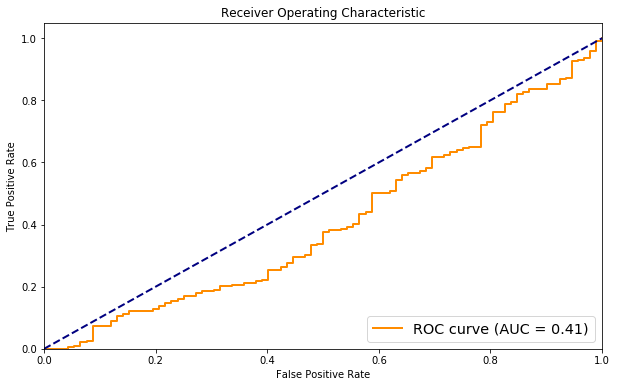

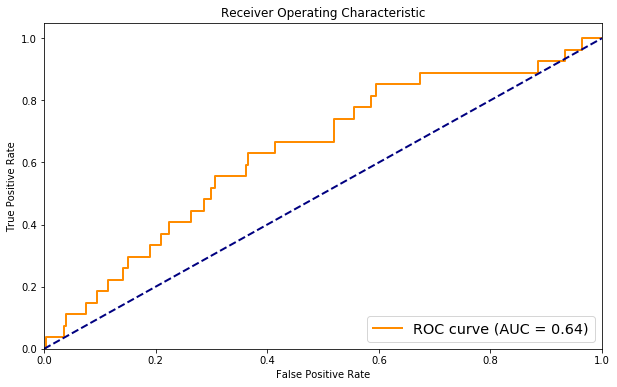

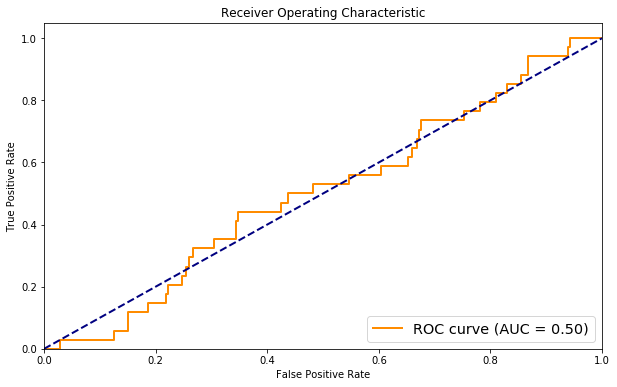

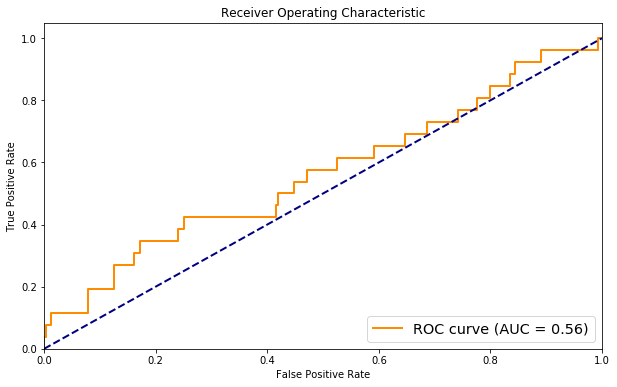

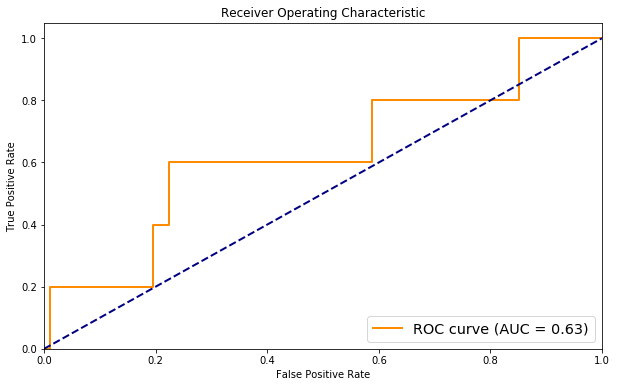

In [63]:
train_X, train_y, test_X, test_y = data_vals(train,test,factors,"recidivism_severity")

model = LogisticRegression(solver='liblinear', multi_class="auto")
model.fit(train_X, train_y)

predALL_y = model.predict_proba(test_X)[:,1]

test_severity_0 = (test_y == 0)
_ = draw_roc_curve(test_severity_0, predALL_y)

test_severity_1 = (test_y == 1)
_ = draw_roc_curve(test_severity_1, predALL_y)

test_severity_2 = (test_y == 2)
_ = draw_roc_curve(test_severity_2, predALL_y)

test_severity_3 = (test_y == 3)
_ = draw_roc_curve(test_severity_3, predALL_y)

test_severity_4 = (test_y == 4)
_ = draw_roc_curve(test_severity_4, predALL_y)

The AUC scores of One vs Rest ROC curves shows that predicting recidivism_severity is a mixed bag. severity=0 has a really poor ROC curve, severity=4 has a great ROC curve while the rest are similar in accuracies to prediction of recidivism.

# Part 4

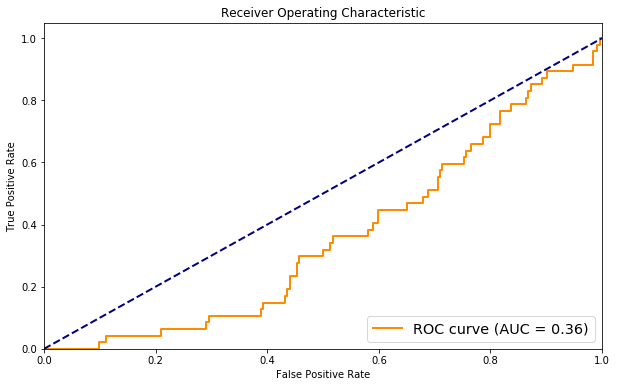

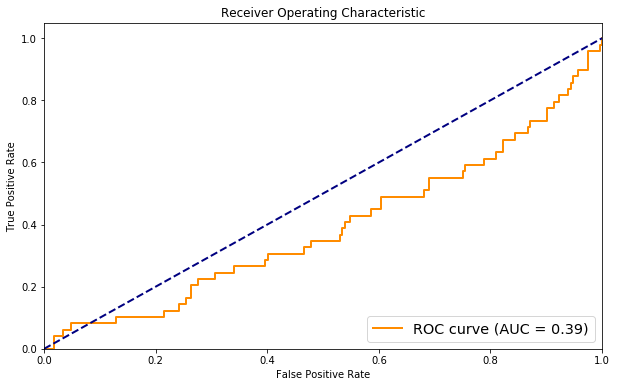

In [64]:
train_X, train_y, test_X, test_y = data_vals(train,test,factors,"recidivism_violence_first_offence")

model = LogisticRegression(solver='liblinear', multi_class="auto")
model.fit(train_X, train_y)

predALL_y = model.predict_proba(test_X)[:,1]

test_violence = (test_y == "Violent")
_ = draw_roc_curve(test_violence, predALL_y)

test_non_violence = (test_y == "No violent")
_ = draw_roc_curve(test_non_violence, predALL_y)

The ROC curve shows alot of false positives occuring and hence less accurate predictions.

# Part 5

In [65]:
train_X, train_y, test_X, test_y = data_vals(train,test,factors,"recidivism")

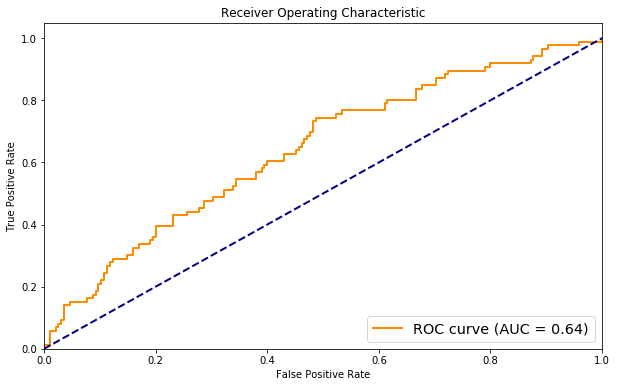

In [47]:
# CHATOS
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

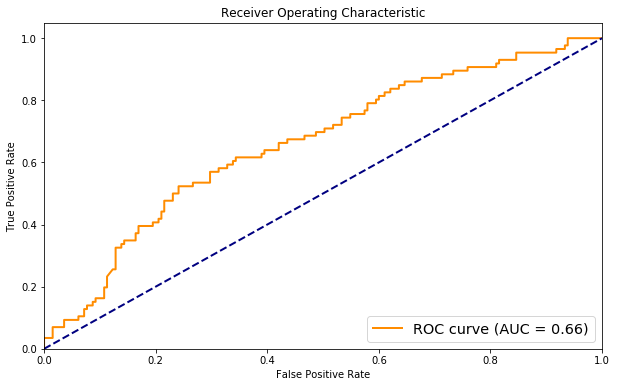

In [48]:
# MODEL 1
model = SVC(probability=True, gamma='auto')
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

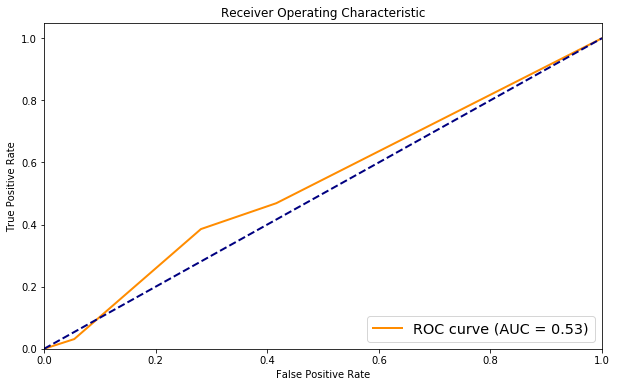

In [72]:
# MODEL 2
model = DecisionTreeClassifier(max_depth = 2)
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)